In [3]:
# import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime

#### Analyzing the state level of obesity from years 2011 to 2015 in Oklahoma.

# Load Data

In [549]:
# load demographic data on obesity

health_activity_df = pd.read_csv('https://query.data.world/s/vaieez73ncrcgx3jukfw6gjgfqkmke?dws=00000',
                                usecols=[0,3,7,10,18,19,20,21,22],
                                names=['year', 'state','question', 'percentage', 'age', 'education', 'gender', 'income', 'ethnicity'],
                                skiprows=[0])
health_activity_df.head()

,year,state,question,percentage,age,education,gender,income,ethnicity
0,2011,Alabama,Percent of adults aged 18 years and older who ...,32.0,NaN,NaN,NaN,NaN,NaN
1,2011,Alabama,Percent of adults aged 18 years and older who ...,32.3,NaN,NaN,Male,NaN,NaN
2,2011,Alabama,Percent of adults aged 18 years and older who ...,31.8,NaN,NaN,Female,NaN,NaN
3,2011,Alabama,Percent of adults aged 18 years and older who ...,33.6,NaN,Less than high school,NaN,NaN,NaN
4,2011,Alabama,Percent of adults aged 18 years and older who ...,32.8,NaN,High school graduate,NaN,NaN,NaN


In [550]:
# load labels for demographic data on obesity

health_topics_df = pd.read_csv('https://query.data.world/s/ixpylz7akidrrucixdkdkw3qwarfwv?dws=00000',
                              usecols=[0,2,3],
                              names=['category', 'question', 'description'],
                              skiprows=[0])
health_topics_df.head()

,category,question,description
0,Fruits and Vegetables,Percent of adults who report consuming fruit l...,NoFruit
1,Fruits and Vegetables,Percent of adults who report consuming vegetab...,NoVeg
2,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,18+Overweight
3,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,18+Obese
4,Physical Activity,Percent of adults who achieve at least 150 min...,Aerobic


In [551]:
# function to replace health question with label

def health_q_replace(question, index):
    health_activity_df['question'] = np.where(health_activity_df['question'] == f'{question}', health_topics_df['description'][index], health_activity_df['question'])

In [552]:
health_q_replace('Percent of adults who report consuming fruit less than one time daily', 0)
health_q_replace('Percent of adults who report consuming vegetables less than one time daily', 1)
health_q_replace('Percent of adults aged 18 years and older who have an overweight classification', 2)
health_q_replace('Percent of adults aged 18 years and older who have obesity', 3)
health_q_replace('Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 4)
health_q_replace('Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week', 5)
health_q_replace('Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 6)
health_q_replace('Percent of adults who engage in muscle-strengthening activities on 2 or more days a week', 7)
health_q_replace('Percent of adults who engage in no leisure-time physical activity', 8)
health_activity_df.head()

,year,state,question,percentage,age,education,gender,income,ethnicity
0,2011,Alabama,18+Obese,32.0,NaN,NaN,NaN,NaN,NaN
1,2011,Alabama,18+Obese,32.3,NaN,NaN,Male,NaN,NaN
2,2011,Alabama,18+Obese,31.8,NaN,NaN,Female,NaN,NaN
3,2011,Alabama,18+Obese,33.6,NaN,Less than high school,NaN,NaN,NaN
4,2011,Alabama,18+Obese,32.8,NaN,High school graduate,NaN,NaN,NaN


In [553]:
# select for Oklahoma as state

oklahoma_df = health_activity_df.loc[health_activity_df['state'] == 'Oklahoma']
oklahoma_df.head()

,year,state,question,percentage,age,education,gender,income,ethnicity
24765,2012,Oklahoma,18+Obese,31.4,NaN,NaN,Female,NaN,NaN
24952,2011,Oklahoma,18+Obese,30.6,NaN,NaN,Male,NaN,NaN
24953,2011,Oklahoma,18+Obese,31.5,NaN,NaN,Female,NaN,NaN
24954,2011,Oklahoma,18+Obese,31.0,NaN,Less than high school,NaN,NaN,NaN
24955,2011,Oklahoma,18+Obese,33.8,NaN,High school graduate,NaN,NaN,NaN


In [554]:
# select for obesity percentage question

oklahoma_df = oklahoma_df.loc[oklahoma_df['question'] == '18+Obese']
oklahoma_df.head()

,year,state,question,percentage,age,education,gender,income,ethnicity
24765,2012,Oklahoma,18+Obese,31.4,NaN,NaN,Female,NaN,NaN
24952,2011,Oklahoma,18+Obese,30.6,NaN,NaN,Male,NaN,NaN
24953,2011,Oklahoma,18+Obese,31.5,NaN,NaN,Female,NaN,NaN
24954,2011,Oklahoma,18+Obese,31.0,NaN,Less than high school,NaN,NaN,NaN
24955,2011,Oklahoma,18+Obese,33.8,NaN,High school graduate,NaN,NaN,NaN


In [555]:
# create df based on obesity percentages for age category

age_df = oklahoma_df[oklahoma_df['age'].notnull()]
age_df = age_df.drop(columns=['education', 'gender', 'income', 'ethnicity'], axis=1).reset_index(drop=True)
age_df.head()

,year,state,question,percentage,age
0,2011,Oklahoma,18+Obese,19.7,18 - 24
1,2011,Oklahoma,18+Obese,29.4,25 - 34
2,2011,Oklahoma,18+Obese,40.0,35 - 44
3,2011,Oklahoma,18+Obese,32.7,45 - 54
4,2011,Oklahoma,18+Obese,37.4,55 - 64


In [556]:
# create df based on obesity percentages for education level

education_df = oklahoma_df[oklahoma_df['education'].notnull()]
education_df = education_df.drop(columns=['age', 'gender', 'income', 'ethnicity'], axis=1).reset_index(drop=True)
education_df.head()

,year,state,question,percentage,education
0,2011,Oklahoma,18+Obese,31.0,Less than high school
1,2011,Oklahoma,18+Obese,33.8,High school graduate
2,2011,Oklahoma,18+Obese,31.3,Some college or technical school
3,2011,Oklahoma,18+Obese,26.5,College graduate
4,2012,Oklahoma,18+Obese,31.9,Less than high school


In [557]:
# create df based on obesity percentages for gender

gender_df = oklahoma_df[oklahoma_df['gender'].notnull()]
gender_df = gender_df.drop(columns=['education', 'age', 'income', 'ethnicity'], axis=1).reset_index(drop=True)
gender_df.head()

,year,state,question,percentage,gender
0,2012,Oklahoma,18+Obese,31.4,Female
1,2011,Oklahoma,18+Obese,30.6,Male
2,2011,Oklahoma,18+Obese,31.5,Female
3,2012,Oklahoma,18+Obese,33.1,Male
4,2013,Oklahoma,18+Obese,32.9,Male


In [558]:
# create df based on obesity percentages for income level

income_df = oklahoma_df[oklahoma_df['income'].notnull()]
income_df = income_df.drop(columns=['education', 'age', 'gender', 'ethnicity'], axis=1).reset_index(drop=True)
income_df.head()

,year,state,question,percentage,income
0,2011,Oklahoma,18+Obese,33.2,"Less than $15,000"
1,2011,Oklahoma,18+Obese,35.8,"$15,000 - $24,999"
2,2011,Oklahoma,18+Obese,29.4,"$25,000 - $34,999"
3,2011,Oklahoma,18+Obese,36.2,"$35,000 - $49,999"
4,2011,Oklahoma,18+Obese,32.5,"$50,000 - $74,999"


In [559]:
# create df based on obesity percentages for different ethnicities

ethnicity_df = oklahoma_df[oklahoma_df['ethnicity'].notnull()]
ethnicity_df = ethnicity_df.drop(columns=['education', 'age', 'gender', 'income'], axis=1).reset_index(drop=True)
ethnicity_df.head()

,year,state,question,percentage,ethnicity
0,2011,Oklahoma,18+Obese,30.4,Non-Hispanic White
1,2011,Oklahoma,18+Obese,34.8,Non-Hispanic Black
2,2011,Oklahoma,18+Obese,28.6,Hispanic
3,2011,Oklahoma,18+Obese,14.7,Asian
4,2011,Oklahoma,18+Obese,NaN,Hawaiian/Pacific Islander


# Clean Data

In [561]:
oklahoma_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 24765 to 47795
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        140 non-null    int64  
 1   state       140 non-null    object 
 2   question    140 non-null    object 
 3   percentage  129 non-null    float64
 4   age         30 non-null     object 
 5   education   20 non-null     object 
 6   gender      10 non-null     object 
 7   income      35 non-null     object 
 8   ethnicity   40 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 10.9+ KB


In [562]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        30 non-null     int64  
 1   state       30 non-null     object 
 2   question    30 non-null     object 
 3   percentage  30 non-null     float64
 4   age         30 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [563]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        20 non-null     int64  
 1   state       20 non-null     object 
 2   question    20 non-null     object 
 3   percentage  20 non-null     float64
 4   education   20 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 932.0+ bytes


In [564]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        10 non-null     int64  
 1   state       10 non-null     object 
 2   question    10 non-null     object 
 3   percentage  10 non-null     float64
 4   gender      10 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 532.0+ bytes


In [565]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        35 non-null     int64  
 1   state       35 non-null     object 
 2   question    35 non-null     object 
 3   percentage  35 non-null     float64
 4   income      35 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ KB


In [566]:
ethnicity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        40 non-null     int64  
 1   state       40 non-null     object 
 2   question    40 non-null     object 
 3   percentage  29 non-null     float64
 4   ethnicity   40 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ KB


In [567]:
# return null values for ethnicity df

null_mask = ethnicity_df.isnull().any(axis=1)
null_rows = ethnicity_df[null_mask]

print(null_rows)

    year     state  question  percentage                  ethnicity
4   2011  Oklahoma  18+Obese         NaN  Hawaiian/Pacific Islander
7   2011  Oklahoma  18+Obese         NaN                      Other
12  2012  Oklahoma  18+Obese         NaN  Hawaiian/Pacific Islander
15  2012  Oklahoma  18+Obese         NaN                      Other
20  2013  Oklahoma  18+Obese         NaN  Hawaiian/Pacific Islander
23  2013  Oklahoma  18+Obese         NaN                      Other
28  2014  Oklahoma  18+Obese         NaN  Hawaiian/Pacific Islander
31  2014  Oklahoma  18+Obese         NaN                      Other
32  2015  Oklahoma  18+Obese         NaN                      Asian
33  2015  Oklahoma  18+Obese         NaN  Hawaiian/Pacific Islander
34  2015  Oklahoma  18+Obese         NaN                      Other


In [573]:
# drop 'Hawaiian/Pacific Islander' and 'Other' ethnicities

ethnicity_df.drop(ethnicity_df[ethnicity_df['ethnicity'] == 'Hawaiian/Pacific Islander'].index, inplace = True)
ethnicity_df.drop(ethnicity_df[ethnicity_df['ethnicity'] == 'Other'].index, inplace = True)

In [574]:
# fill in 'Asian' 'percentage' NaN value with 'Asian' mean

ethnicity_df.fillna(ethnicity_df.loc[ethnicity_df['ethnicity'] == 'Asian', 'percentage'].mean())

,year,state,question,percentage,ethnicity
0,2011,Oklahoma,18+Obese,30.40,Non-Hispanic White
1,2011,Oklahoma,18+Obese,34.80,Non-Hispanic Black
2,2011,Oklahoma,18+Obese,28.60,Hispanic
3,2011,Oklahoma,18+Obese,14.70,Asian
5,2011,Oklahoma,18+Obese,40.80,American Indian/Alaska Native
6,2011,Oklahoma,18+Obese,32.90,2 or more races
8,2012,Oklahoma,18+Obese,31.00,Non-Hispanic White
9,2012,Oklahoma,18+Obese,45.50,Non-Hispanic Black
10,2012,Oklahoma,18+Obese,30.60,Hispanic
11,2012,Oklahoma,18+Obese,4.40,Asian


In [568]:
# drop null values for Oklahoma df

oklahoma_df.drop(oklahoma_df[oklahoma_df['ethnicity'] == 'Hawaiian/Pacific Islander'].index, inplace = True)
oklahoma_df.drop(oklahoma_df[oklahoma_df['ethnicity'] == 'Other'].index, inplace = True)

In [570]:
# replace 'Asian' null with mean

oklahoma_df['percentage'] = oklahoma_df['percentage'].fillna(oklahoma_df.loc[oklahoma_df['ethnicity'] == 'Asian', 'percentage'].mean())

# Data Exploratory Analysis

In [582]:
oklahoma_df.describe()

,year,percentage
count,130.000000,130.000000
mean,2013.000000,32.163462
std,1.419684,6.207640
min,2011.000000,4.400000
25%,2012.000000,30.325000
50%,2013.000000,33.000000
75%,2014.000000,35.675000
max,2015.000000,47.300000


In [583]:
age_df.describe()

,year,percentage
count,30.00000,30.000000
mean,2013.00000,32.380000
std,1.43839,6.299009
min,2011.00000,19.700000
25%,2012.00000,27.200000
50%,2013.00000,33.450000
75%,2014.00000,37.550000
max,2015.00000,43.300000


In [584]:
education_df.describe()

,year,percentage
count,20.000000,20.000000
mean,2013.000000,32.265000
std,1.450953,3.602525
min,2011.000000,25.600000
25%,2012.000000,30.325000
50%,2013.000000,33.850000
75%,2014.000000,34.925000
max,2015.000000,36.300000


In [585]:
gender_df.describe()

,year,percentage
count,10.000000,10.000000
mean,2013.000000,32.540000
std,1.490712,1.110755
min,2011.000000,30.600000
25%,2012.000000,31.675000
50%,2013.000000,32.700000
75%,2014.000000,33.400000
max,2015.000000,34.000000


In [586]:
income_df.describe()

,year,percentage
count,35.00000,35.000000
mean,2013.00000,32.602857
std,1.43486,3.818337
min,2011.00000,24.000000
25%,2012.00000,30.550000
50%,2013.00000,33.500000
75%,2014.00000,35.000000
max,2015.00000,38.700000


In [587]:
ethnicity_df.describe()

,year,percentage
count,30.00000,29.000000
mean,2013.00000,31.865517
std,1.43839,9.658907
min,2011.00000,4.400000
25%,2012.00000,30.600000
50%,2013.00000,33.000000
75%,2014.00000,36.400000
max,2015.00000,47.300000


# Data Visualization

In [589]:
# create iterable list of df columns

oklahoma_df_col = oklahoma_df.columns.to_list()

In [590]:
# function results in df unique values for each column

def get_unique_values(df, columns):
    for col in columns:
      num_unique_values = len(df[col].unique())
      value_counts = df[col].value_counts()
      print(f"Column: {col} has {num_unique_values} unique values\n")
      print(value_counts)

In [591]:
get_unique_values(oklahoma_df, oklahoma_df_col)

Column: year has 5 unique values

year
2012    26
2011    26
2013    26
2014    26
2015    26
Name: count, dtype: int64
Column: state has 1 unique values

state
Oklahoma    130
Name: count, dtype: int64
Column: question has 1 unique values

question
18+Obese    130
Name: count, dtype: int64
Column: percentage has 88 unique values

percentage
34.3    4
36.4    4
32.9    4
35.7    3
31.9    3
       ..
35.6    1
32.6    1
28.3    1
25.0    1
47.3    1
Name: count, Length: 88, dtype: int64
Column: age has 7 unique values

age
18 - 24        5
25 - 34        5
35 - 44        5
45 - 54        5
55 - 64        5
65 or older    5
Name: count, dtype: int64
Column: education has 5 unique values

education
Less than high school               5
High school graduate                5
Some college or technical school    5
College graduate                    5
Name: count, dtype: int64
Column: gender has 3 unique values

gender
Female    5
Male      5
Name: count, dtype: int64
Column: income has 8 un

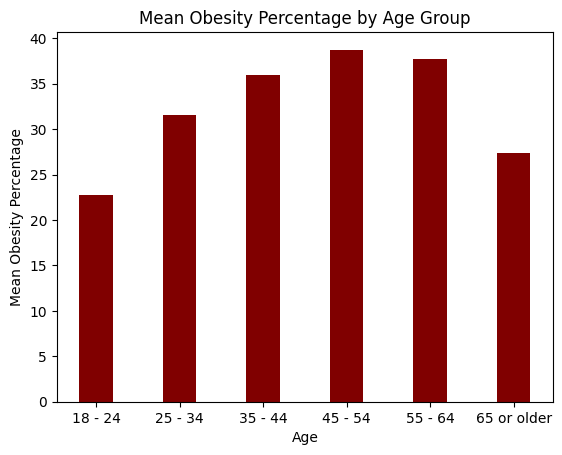

In [593]:
# group values by 'age' category and take the mean

age_grouped = age_df.groupby('age')['percentage'].mean().reset_index()

# create a bar plot

plt.bar(age_grouped['age'], age_grouped['percentage'], color='maroon', width=0.4)
plt.xlabel('Age')
plt.ylabel('Mean Obesity Percentage')
plt.title('Mean Obesity Percentage by Age Group')
plt.show()

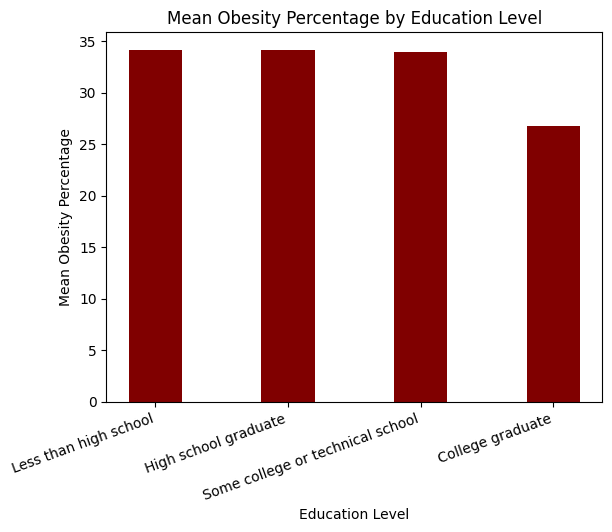

In [636]:
# group values by 'education' category and take the mean

education_grouped = education_df.groupby('education')['percentage'].mean().reset_index()
education_levels = ['Less than high school', 'High school graduate', 'Some college or technical school', 'College graduate']
education_grouped['education'] = pd.Categorical(education_grouped['education'], categories = education_levels , ordered = True)

# create a bar plot

plt.bar(education_grouped['education'], education_grouped['percentage'], color='maroon', width=0.4)
plt.xlabel('Education Level')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Mean Obesity Percentage')
plt.title('Mean Obesity Percentage by Education Level')
plt.show()

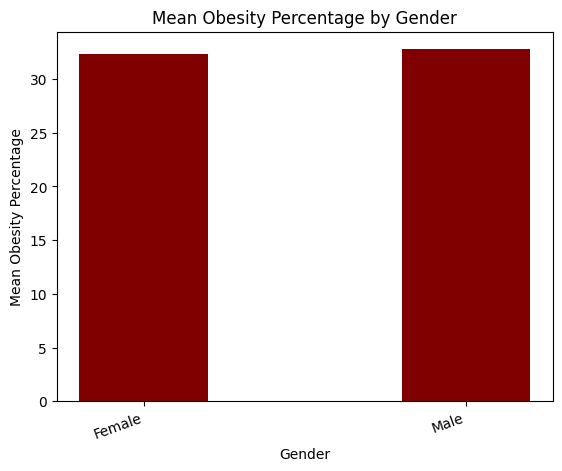

In [595]:
# group values by 'gender' category and take the mean

gender_grouped = gender_df.groupby('gender')['percentage'].mean().reset_index()

# create a bar plot

plt.bar(gender_grouped['gender'], gender_grouped['percentage'], color='maroon', width=0.4)
plt.xlabel('Gender')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Mean Obesity Percentage')
plt.title('Mean Obesity Percentage by Gender')
plt.show()

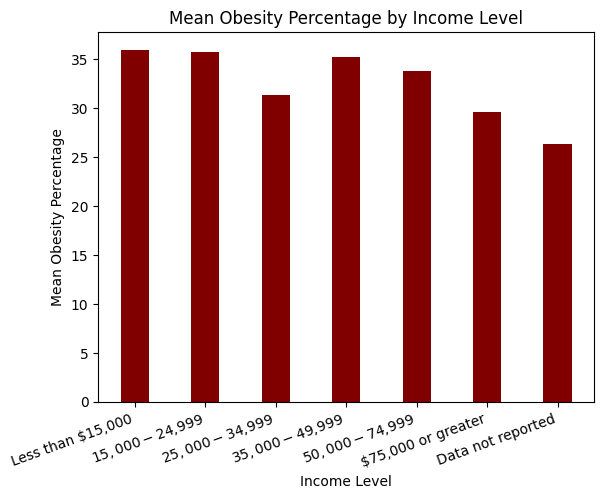

In [646]:
# group values by 'income' category and take the mean

income_grouped = income_df.groupby('income')['percentage'].mean().reset_index()
income_levels = ['Less than $15,000', '$15,000 - $24,999', '$25,000 - $34,999', '$35,000 - $49,999', '$50,000 - $74,999', '$75,000 or greater', 'Data not reported']
income_grouped['income'] = pd.Categorical(income_grouped['income'], categories=income_levels, ordered=True)

# sort the DataFrame by the categorical variable to ensure correct order

income_grouped = income_grouped.sort_values('income')

# create a bar plot

plt.bar(income_grouped['income'], income_grouped['percentage'], color='maroon', width=0.4)
plt.xlabel('Income Level')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Mean Obesity Percentage')
plt.title('Mean Obesity Percentage by Income Level')
plt.show()

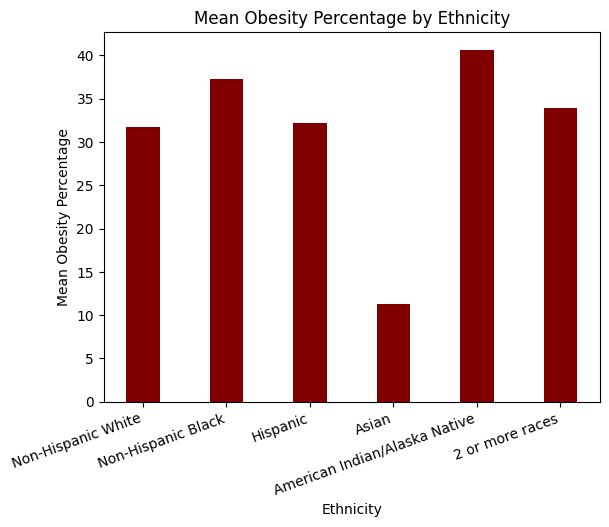

In [647]:
# group values by 'ethnicity' category and take the mean

ethnicity_grouped = ethnicity_df.groupby('ethnicity')['percentage'].mean().reset_index()
ethnicity_levels = ['Non-Hispanic White', 'Non-Hispanic Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native', '2 or more races']
ethnicity_grouped['ethnicity'] = pd.Categorical(ethnicity_grouped['ethnicity'], categories = ethnicity_levels , ordered = True)

# sort the DataFrame by the categorical variable to ensure correct order

ethnicity_grouped = ethnicity_grouped.sort_values('ethnicity')

# create a bar plot

plt.bar(ethnicity_grouped['ethnicity'], ethnicity_grouped['percentage'], color='maroon', width=0.4)
plt.xlabel('Ethnicity')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Mean Obesity Percentage')
plt.title('Mean Obesity Percentage by Ethnicity')
plt.show()

## Regression Analysis to Predict Obesity

In [368]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [611]:
# create dummy variables for each demographic category

dummy_df = pd.get_dummies(oklahoma_df, columns=['age', 'education', 'gender', 'income', 'ethnicity'], dtype=np.int64).reset_index(drop=True)

In [612]:
# drop nonnumerical categories

dummy_df.drop(columns=['year', 'state', 'question'], inplace=True)

In [614]:
X = dummy_df.drop('percentage', axis=1)
y = dummy_df['percentage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [615]:
# create and train a linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the testing set

y_pred = model.predict(X_test)

# evaluate the model's performance

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# print the coefficients (impact of each ethnicity category on obesity rate)

coefficients = model.coef_
print("Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"{X.columns[i]}: {coef}")

Mean Squared Error: 8.14719799741607
Coefficients:
age_18 - 24: -10.399999999999997
age_25 - 34: -1.6199999999999966
age_35 - 44: 2.8750000000000036
age_45 - 54: 7.93333333333337
age_55 - 64: 3.9333333333333025
age_65 or older: -5.350000000000065
education_College graduate: -6.420000000000003
education_High school graduate: 1.2499999999999876
education_Less than high school: 0.5999999999999807
education_Some college or technical school: -0.3666666666666757
gender_Female: -1.1333333333333355
gender_Male: -0.6249999999999756
income_$15,000 - $24,999: 2.800000000000001
income_$25,000 - $34,999: -2.0999999999999948
income_$35,000 - $49,999: 2.2500000000000155
income_$50,000 - $74,999: 0.2666666666666785
income_$75,000 or greater: -2.4000000000000057
income_Data not reported: -5.299999999999922
income_Less than $15,000: 2.166666666666678
ethnicity_2 or more races: 1.2000000000000344
ethnicity_American Indian/Alaska Native: 7.424999999999988
ethnicity_Asian: -21.95000000000001
ethnicity_Hisp

In [616]:
# test for the p value

import statsmodels.api as sm
X = sm.add_constant(X)  # Add a constant term for the intercept
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             percentage   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     26.82
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.29e-34
Time:                        21:36:08   Log-Likelihood:                -290.81
No. Observations:                 130   AIC:                             633.6
Df Residuals:                     104   BIC:                             708.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [658]:
from statsmodels.stats.diagnostic import het_white

In [657]:
# perform White's test

white_test = het_white(results.resid,  results.model.exog)

# define labels to use for output of White's test

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

# print results of White's test

print(dict(zip(labels, white_test)))

{'Test Statistic': 42.92757373842255, 'Test Statistic p-value': 0.014254983301014207, 'F-Statistic': 2.0509214503264555, 'F-Test p-value': 0.00633603065028783}
